# **Enhancing Restaurant Ratings: Leveraging NLP and Machine Learning for Customer Insights**

## **Executive Summary of Project**

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>This project utilizes Machine Learning and Text Analytics to assist restaurants in improving their star ratings. By analyzing the text reviews from the Yelp dataset, the project uncovers valuable insights into customer feedback. Key objectives include predicting star ratings and identifying recurring customer complaints, enabling restaurants to make data-driven improvements that enhance customer satisfaction and foster positive experiences.</b>
</h>

## **Data Sources**

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
    <b>
        <a href="https://business.yelp.com/data/resources/open-dataset/" target="_blank" style="text-decoration: none; color: inherit;">
            Link: https://business.yelp.com/data/resources/open-dataset/" target="_blank" style="text-decoration: none; color: inherit
        </a>
    </b>
</h1>


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Description: The Yelp Open Dataset is a subset of Yelp data that is intended for educational use. It provides real-world data related to businesses including reviews, photos, check-ins, and attributes like hours, parking availability, and ambience.</b>
</h>


## **Yelp Business Dataset**

In [1]:
# List the data sources
import boto3
import json
import pandas as pd

# S3 client setup
s3 = boto3.client('s3')

# Define the S3 bucket and file key
bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
file_key = 'dzd_5l5kah6gnsnq3r/6qy75n1h6r5bjb/dev/yelp_academic_dataset_business.json'

# Fetch the file from S3
response = s3.get_object(Bucket=bucket_name, Key=file_key)

# Read the file content line by line
lines = response['Body'].read().decode('utf-8').splitlines()

# Parse each line safely and collect valid JSON objects
valid_data = []
invalid_lines = []

for i, line in enumerate(lines):
    try:
        valid_data.append(json.loads(line))
    except json.JSONDecodeError:
        invalid_lines.append((i, line))  # Record the line index and content for debugging

# Convert the valid data into a pandas DataFrame
df_business = pd.DataFrame(valid_data)

print(f"Number of valid lines: {len(valid_data)}")
print(f"Number of invalid lines: {len(invalid_lines)}")

# Debug invalid lines (optional)
for index, content in invalid_lines[:5]:  # Show only the first 5 invalid lines
    print(f"Invalid line {index}: {content}")

# delete rows with missing values
df_business = df_business.dropna()
df_business

Number of valid lines: 150346
Number of invalid lines: 0


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


## **Yelp Review Dataset**

In [2]:
# Define the S3 bucket and file key
bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
file_key = 'dzd_5l5kah6gnsnq3r/6qy75n1h6r5bjb/dev/yelp_academic_dataset_review.json'

# Fetch the file from S3
response = s3.get_object(Bucket=bucket_name, Key=file_key)

# Read the file content line by line
lines = response['Body'].read().decode('utf-8').splitlines()

# Parse each line safely and collect valid JSON objects
valid_data = []
invalid_lines = []

for i, line in enumerate(lines):
    try:
        valid_data.append(json.loads(line))
    except json.JSONDecodeError:
        invalid_lines.append((i, line))  # Record the line index and content for debugging

# Convert the valid data into a pandas DataFrame
df_review = pd.DataFrame(valid_data)

print(f"Number of valid lines: {len(valid_data)}")
print(f"Number of invalid lines: {len(invalid_lines)}")

# Debug invalid lines (optional)
for index, content in invalid_lines[:5]:  # Show only the first 5 invalid lines
    print(f"Invalid line {index}: {content}")
    
df_review

Number of valid lines: 213558
Number of invalid lines: 1
Invalid line 213558: {"review_id":"2VmqvqY_OAwji3uIvrbX6g","user_id":"1MqJBdgHUwWkVOq1M01K_w","business_id":"6NYi9Uj5j0jQgNYpEfl2xg","stars":2.0,"useful":0,"funny":0,"co


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
213553,yXaD2hoLZc7bPRKDjm0ksw,z6I40mrJpEfbsH4LW76eLA,MOB89CuyGQrdolDzyPwLnw,4.0,2,2,3,"While staying in my boyfriend's hometown, we s...",2014-01-06 04:04:54
213554,YuxCEhmo1sFb0R4MzoHS9A,1OnqGnkbTF4-bX5a15YhQw,vUrTGX_7HxqeoQ_6QCVz6g,5.0,1,0,0,"Amazing and authentic Lebanese food, highly re...",2018-07-21 18:59:59
213555,CoAYfs2bnwwvNdwpELrlcw,N8YLyWHlzIzRHVfJJr-7Ag,nSSoWHnmdkTRj8MA3Gj4AA,4.0,1,0,0,The place has a modern feel with music pumping...,2016-08-29 16:13:40
213556,ZnFpq8T5z-r7XgbPbQNLvg,ak6-rcYXQvodqY7kRcEcBw,h-bXrwqcxFA5cz_ATTIQeA,2.0,0,0,0,"Clean restaurant with lots of wood, good light...",2016-02-17 13:47:17


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>First step, we need to narrow down the dataset's scope since it is too broad.</b>
</h>

In [3]:
# Data observation
print(df_business["state"].value_counts())
print("\n")
print(df_business["categories"].value_counts())

state
PA    26317
FL    20974
TN     9619
IN     8856
MO     8848
AZ     7793
LA     7644
NJ     6620
NV     5844
AB     4111
CA     3951
ID     3600
DE     1761
IL     1669
TX        2
NC        1
WA        1
CO        1
MT        1
MI        1
HI        1
SD        1
VI        1
VT        1
Name: count, dtype: int64


categories
Beauty & Spas, Nail Salons                                                                                                             633
Restaurants, Pizza                                                                                                                     613
Nail Salons, Beauty & Spas                                                                                                             564
Pizza, Restaurants                                                                                                                     532
Restaurants, Mexican                                                                                           

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>After observing the Yelp Business Dataset, we decided to narrow down our focus to restaurants in AZ, excluding those categorized as Fast Food.</b>
</h>

In [4]:
# The filtering/selection criteria
df_business_AZ = df_business[df_business['state'].astype(str) == 'AZ']
df_business_new = df_business_AZ[
    df_business_AZ["categories"].astype(str).str.contains("Restaurants", case=False, na=False) &
    ~df_business_AZ["categories"].astype(str).str.contains("Fast Food", case=False, na=False)
]
df_business_new

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
45,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,"1625 W Valencia Rd, Ste 101-103",Tucson,AZ,85746,32.132305,-110.999985,3.0,23,0,"{'WiFi': ''no'', 'BusinessParking': '{'garage'...","Restaurants, Chinese","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
132,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
234,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,2944 W Ina Rd,Tucson,AZ,85741,32.338724,-111.030310,4.0,58,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Sports Bars, Bars, Nightlife, Italian, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ..."
319,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ''casual'', 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
457,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,5680 S 12th Ave,Tucson,AZ,85706,32.149473,-110.978186,4.0,92,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Chinese","{'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150017,kwwKAjMvZk4uANTzgltT-g,China Boy,"1800 E Fort Lowell Rd, Ste 136",Tucson,AZ,85719,32.264821,-110.944833,3.5,17,0,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Restaurants, Chinese","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
150034,DaBATIXMTo3kqt00rCc9Tg,Risky Business,8848 E Tanque Verde Rd,Tucson,AZ,85749,32.257496,-110.803966,3.0,84,1,"{'RestaurantsPriceRange2': '2', 'GoodForKids':...","Sports Bars, Bars, American (Traditional), Res...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
150055,afUES0Ul1NYPzQa7PdT2Yw,Alloro D.O.C.,7600 East Broadway Blvd,Tucson,AZ,85710,32.219594,-110.830286,4.0,25,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Tru...","Steakhouses, Breakfast & Brunch, Italian, Rest...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
150135,Fqg3sac6ubGkoMJbs19wZQ,California Pizza Kitchen,"4500 N Oracle Road, Suite 341",Tucson,AZ,85705,32.288659,-110.974161,3.5,54,0,"{'Ambience': '{'romantic': False, 'intimate': ...","American (New), Restaurants, American (Traditi...","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Next, We are going to process Yelp Review Dataset.</b>
</h>

In [5]:
# Filter the 'df_review' DataFrame to include only rows where 'business_id' is in 'df_filtered'
df_review_new = df_review[df_review['business_id'].isin(df_business_new['business_id'])]
df_review_new

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4.0,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
75,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26
147,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04
185,M7h8K7PrLrN8yQb3RhHLdA,CysTz612pTix75Fye6-D4Q,WLiqfxv_GhFFA5sm878a2w,5.0,0,1,1,Blew $80 on food for the family was worth it f...,2013-12-29 03:15:34
192,dEVDg2FyOR2sJnbR_JcivQ,7zJVt_Bl1h5hLjhxl2c1PQ,3YERGr7UbpSpddqL0Eiu5g,5.0,1,0,1,This is my favorite restaurant! I always orde...,2017-12-16 00:18:10
...,...,...,...,...,...,...,...,...,...
213411,xzwn2ld9ZvsjM4SYjkUhcQ,_xcT4ArOk17YXUOSEuusrg,Y3ZCO17N1_T_Ms1JmswwzA,5.0,2,0,2,The best chicken tacos!!!! Corn tortillas sooo...,2014-08-07 22:45:10
213469,SBqoymydbq3BjVfYY6lMSQ,S6Y1LY7sTHFeTab3IHoROw,wqmAnbS2roEnhKHCHygrSw,4.0,0,0,0,Service was great and I had a combination plat...,2016-12-17 06:28:17
213485,tgza5_eWCQ7wXn1X59LqLg,fr7ac23SbYpBNl-Z-nyv3Q,7OrS8FzIChQmkVgTxOew6w,4.0,0,1,0,"Here ya go, another local good little place to...",2018-03-29 22:45:23
213517,Uq-f0kYNewJgdqxSO3TBMw,NQ3aefsTMRyPMRC_1esSQA,dyVKL3qKsz_XDxtjpbNcgQ,3.0,1,0,0,We visited twice during a recent stay near Tuc...,2014-07-04 21:28:05


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>In this section, we will perform text normalization on the Yelp Review Dataset.</b>
</h>

- Converts it to lowercase (if lowercase=True).
- Lemmatizes it (reducing words to base forms, e.g., "running" → "run").
- Removes stopwords (if remove_stopwords=True, removing common words like "the", "is", etc.).

In [6]:
!python -m spacy download en_core_web_lg
import nltk
import spacy #load spacy
nlp = spacy.load("en_core_web_lg")
print(nlp.pipe_names)
nlp.disable_pipes('ner', 'parser')
print(nlp.pipe_names)

def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)
df_review_new['text'] = df_review_new['text'].apply(normalize, lowercase=True, remove_stopwords=True)
df_review_new

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 81.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4.0,0,2,0,"bun make sonoran dog . like snuggie pup . , ri...",2011-10-27 17:12:05
75,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5.0,0,0,0,start go sushi nara month ( open short time ag...,2014-07-25 17:56:26
147,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5.0,1,0,0,come kid . staff watch kid grow . personable n...,2015-07-03 22:36:04
185,M7h8K7PrLrN8yQb3RhHLdA,CysTz612pTix75Fye6-D4Q,WLiqfxv_GhFFA5sm878a2w,5.0,0,1,1,blow $ 80 food family worth food hot orange ch...,2013-12-29 03:15:34
192,dEVDg2FyOR2sJnbR_JcivQ,7zJVt_Bl1h5hLjhxl2c1PQ,3YERGr7UbpSpddqL0Eiu5g,5.0,1,0,1,"favorite restaurant ! order ceviche , delici...",2017-12-16 00:18:10
...,...,...,...,...,...,...,...,...,...
213411,xzwn2ld9ZvsjM4SYjkUhcQ,_xcT4ArOk17YXUOSEuusrg,Y3ZCO17N1_T_Ms1JmswwzA,5.0,2,0,2,good chicken taco ! ! ! ! corn tortilla sooooo...,2014-08-07 22:45:10
213469,SBqoymydbq3BjVfYY6lMSQ,S6Y1LY7sTHFeTab3IHoROw,wqmAnbS2roEnhKHCHygrSw,4.0,0,0,0,service great combination plate . \n delicious...,2016-12-17 06:28:17
213485,tgza5_eWCQ7wXn1X59LqLg,fr7ac23SbYpBNl-Z-nyv3Q,7OrS8FzIChQmkVgTxOew6w,4.0,0,1,0,"ya , local good little place grab mexican food...",2018-03-29 22:45:23
213517,Uq-f0kYNewJgdqxSO3TBMw,NQ3aefsTMRyPMRC_1esSQA,dyVKL3qKsz_XDxtjpbNcgQ,3.0,1,0,0,"visit twice recent stay near tucson , experien...",2014-07-04 21:28:05


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>After narrowing down our target restaurant and filtering the reviews from the Business Dataset, we will perform Exploratory Data Analysis.</b>
</h>

In [7]:
# Filter the rows where 'stars' column starts with 1 or 2
filtered_df = df_review_new[df_review_new['stars'].astype(str).str.startswith(('1', '2'))]

# Initialize the lists for nouns, verbs, and adjectives
nouns = []
verbs = []
adjectives = []

# Loop through the filtered rows
for doc in nlp.pipe(filtered_df['text']):
  for token in doc:
    if token.pos_ == 'VERB':
      verbs.append(token.lemma_)
    if token.pos_ == 'NOUN':
      nouns.append(token.lemma_)
    if token.pos_ == 'ADJ':  
      adjectives.append(token.lemma_)

from collections import Counter

noun_counter = Counter(nouns)
verb_counter = Counter(verbs)
adjective_counter = Counter(adjectives)  



<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Top 20 Nouns Used in Review Dataset</b>
</h>

3139
[('food', 1134),
 ('order', 747),
 ('place', 665),
 ('time', 571),
 ('service', 505),
 ('restaurant', 373),
 ('table', 354),
 ('minute', 287),
 ('drink', 203),
 ('server', 201),
 ('customer', 198),
 ('people', 197),
 ('price', 188),
 ('chicken', 184),
 ('sauce', 182),
 ('thing', 178),
 ('menu', 177),
 ('way', 174),
 ('meal', 173),
 ('waitress', 168)]
  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)


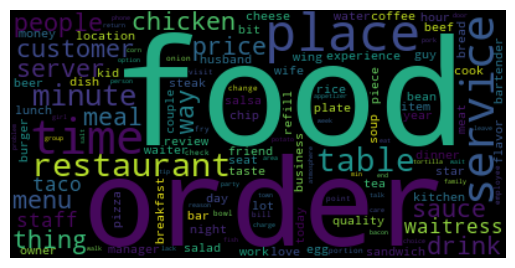

In [8]:
import pprint

print(len(noun_counter))
pprint.pprint(noun_counter.most_common(20))

!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(noun_counter)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Top 20 Verbs Used in Review Dataset</b>
</h>

1007
[('come', 562),
 ('go', 474),
 ('get', 386),
 ('wait', 360),
 ('eat', 336),
 ('ask', 335),
 ('say', 299),
 ('try', 299),
 ('want', 283),
 ('take', 272),
 ('tell', 263),
 ('think', 239),
 ('look', 233),
 ('serve', 184),
 ('order', 182),
 ('give', 175),
 ('know', 174),
 ('sit', 164),
 ('leave', 151),
 ('find', 141),
 ('taste', 135),
 ('bring', 129),
 ('feel', 105),
 ('decide', 96),
 ('need', 95)]


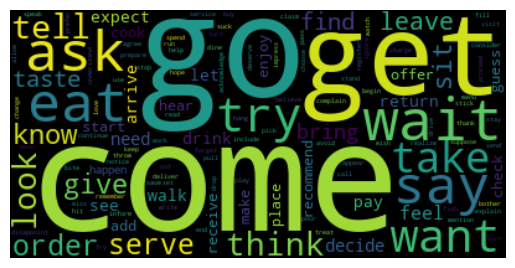

In [9]:
print(len(verb_counter))
pprint.pprint(verb_counter.most_common(25))

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(verb_counter)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Top 20 Adjectives Used in Review Dataset</b>
</h>

1439
[('good', 673),
 ('bad', 332),
 ('great', 222),
 ('small', 158),
 ('nice', 140),
 ('little', 123),
 ('cold', 107),
 ('fresh', 100),
 ('new', 99),
 ('hot', 97),
 ('terrible', 96),
 ('old', 96),
 ('worth', 96),
 ('bland', 92),
 ('dry', 88),
 ('horrible', 86),
 ('long', 85),
 ('big', 85),
 ('friendly', 83),
 ('special', 81),
 ('busy', 79),
 ('open', 75),
 ('poor', 75),
 ('mexican', 73),
 ('high', 73)]


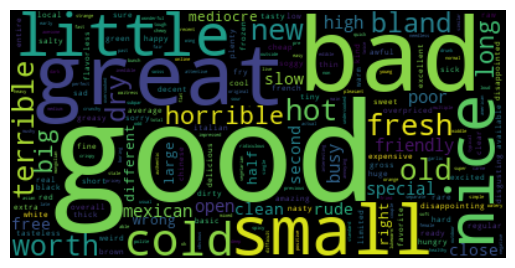

In [10]:
print(len(adjective_counter))
pprint.pprint(adjective_counter.most_common(25))

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(adjective_counter)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Analysis of 1-2 Star Restaurant Reviews**

## **1. Service and Wait Time Issues**
Frequent words like **“wait (360),” “minute (287),” “server (201),” “waitress (168)”** suggest that many customers are unhappy with long wait times, slow service, or poor interactions with staff.  
Verbs such as **“ask (335),” “say (299), “tell (263)”** indicate that customers often need to repeatedly ask for service or complain, implying a lack of attentiveness.  

### **👉 Actionable Insight:**  
- Improve service efficiency by reducing wait times.  
- Streamline order and food delivery processes.  
- Train staff to be more responsive to customer needs.  

---

## **2. Food Quality Issues**
Negative adjectives like **“cold (107),” “bland (92),” “dry (88),” “horrible (86),” “terrible (96)”** suggest that poor food quality is a major factor in negative reviews.  
The verb **“taste (135)”** appears frequently, meaning customers often express dissatisfaction with food flavor.  
High-frequency nouns like **“chicken (184),” “sauce (182)”** indicate that these items might be frequently criticized.  

### **👉 Actionable Insight:**  
- Focus on improving food temperature, seasoning, and overall quality.  
- Pay special attention to commonly mentioned items like chicken and sauces to ensure consistency and flavor.  

---

## **3. Price and Value Perception**
Words like **“price (188),” “worth (96),” “high (73)”** suggest that customers feel the food is overpriced or not worth the cost.  
The adjective **“small (158)”** implies portion sizes may be a concern, contributing to a low perceived value.  

### **👉 Actionable Insight:**  
- If lowering prices is not an option, consider increasing portion sizes.  
- Offer small complimentary items to enhance value.  
- Improve the overall dining experience to justify pricing.  

---

## **4. Environment and Overall Experience Issues**
High-frequency words like **“table (354),” “place (665),” “people (197)”** suggest that seating arrangements and restaurant ambiance may be a concern.  
Adjectives like **“busy (79),” “long (85)”** indicate overcrowding or long wait times, which negatively impact the experience.  

### **👉 Actionable Insight:**  
- Optimize seating arrangements to improve comfort.  
- Implement a more efficient reservation or waiting system.  
- Enhance the overall dining environment to reduce customer frustration.  

---

## **5. Customer Expectations vs. Reality**
Words like **“want (283),” “need (95)”** show that customer expectations are not being met.  
Verbs like **“decide (96),” “leave (151)”** suggest that customers often consider leaving or choosing not to return.  

### **👉 Actionable Insight:**  
- Actively collect and address customer feedback.  
- Align restaurant offerings with customer expectations.  
- Communicate improvements clearly to assure customers their concerns are being heard.  

---

### **🔍 Conclusion**  
Key complaints in low-rated restaurants include **slow service, poor food quality, high prices, and an uncomfortable atmosphere**. Addressing these factors can significantly improve customer satisfaction and ratings. 🚀


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Number of unique customers in Review Dataset</b>
</h>

In [11]:
# Number of unique customers
unique_count_name = df_review_new['user_id'].astype(str).nunique()
print(f"Number of unique values in name: {unique_count_name}")

Number of unique values in name: 5348


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Distribution of the star column in Business Dataset</b>
</h>

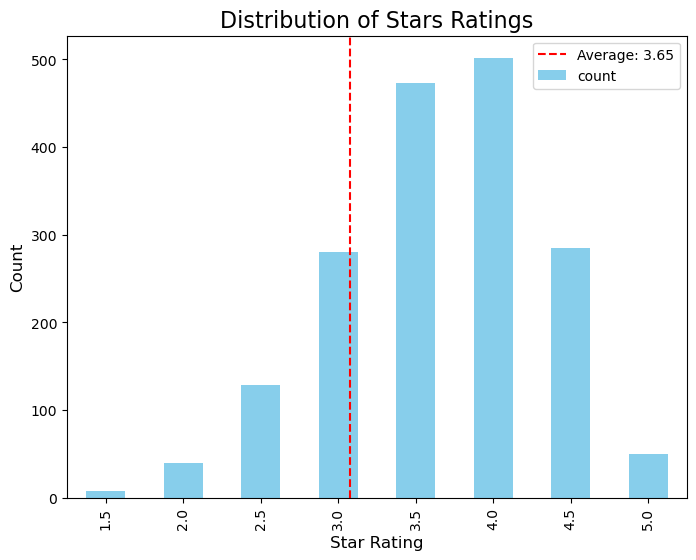

In [12]:
# Visualize the distribution of the star column
import matplotlib.pyplot as plt

# Calculate the average star rating
average_star = df_business_new['stars'].mean()

# Plot the distribution of the 'stars' column
df_business_new['stars'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6), color='skyblue')

# Add titles and labels
plt.title('Distribution of Stars Ratings', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Mark the average line
plt.axvline(x=average_star - 0.5, color='red', linestyle='--', label=f'Average: {average_star:.2f}')

# Show the legend
plt.legend()
plt.show()


<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>Distribution of the review count in Business Dataset</b>
</h>

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


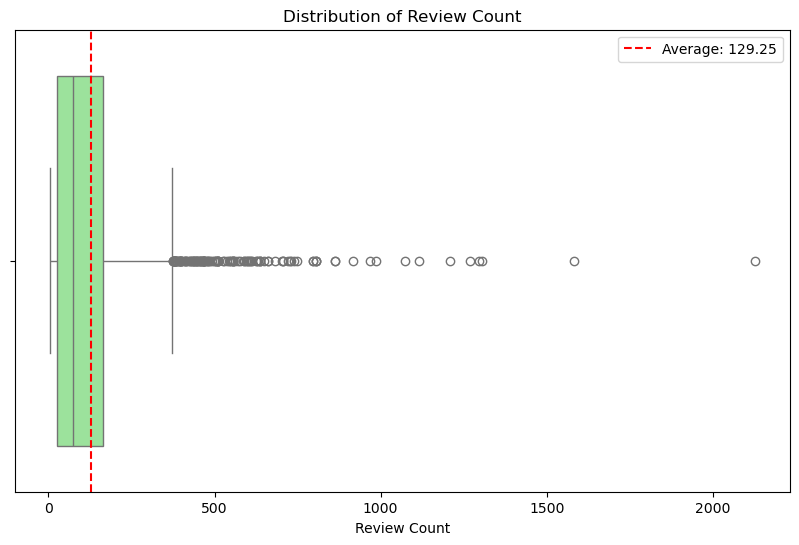

In [13]:
!pip install seaborn
import seaborn as sns

# Calculate the average review_count
average_review_count = df_business_new['review_count'].mean()

# Plotting the distribution of review_count using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_business_new['review_count'], color='lightgreen')

# Adding a vertical line for the average
plt.axvline(average_review_count, color='red', linestyle='--', label=f'Average: {average_review_count:.2f}')

# Title and labels
plt.title('Distribution of Review Count')
plt.xlabel('Review Count')

# Displaying the legend
plt.legend()

# Show plot
plt.show()

## **Finally, we will use Machine Learning for predictive analysis.**

In [14]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_review_new['text'], df_review_new['stars'], test_size=0.2, random_state=5)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z]+')
vectorizer = TfidfVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
X_train_tfidf = vectorizer.fit_transform(X_train)
print(X_train_tfidf.shape)

X_test_tfidf= vectorizer.transform(X_test)
print(X_test_tfidf.shape)

(5384, 800)
(1347, 800)


In [16]:
df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df.head()

,able,absolutely,accommodate,actually,add,addition,afternoon,ago,agree,aj,...,wow,wrap,write,wrong,year,yelp,yes,young,yum,yummy
0,0.238281,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.230591,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Naive Bayes Classification**

In [17]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [18]:
predicted = MNB.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['1', '2', '3', '4', '5'])
print(performance)

              precision    recall  f1-score   support

           1       0.63      0.53      0.58       112
           2       0.40      0.05      0.09       121
           3       0.42      0.06      0.11       164
           4       0.39      0.27      0.32       368
           5       0.56      0.92      0.69       582

    accuracy                           0.53      1347
   macro avg       0.48      0.37      0.36      1347
weighted avg       0.49      0.53      0.46      1347



### **Support Vector Machines (SVM) classification**

In [19]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_tfidf, Y_train)

SVC()

In [20]:
from sklearn import metrics
predicted = clf.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['1', '2', '3', '4', '5'])
print(performance)

              precision    recall  f1-score   support

           1       0.64      0.62      0.63       112
           2       0.49      0.21      0.30       121
           3       0.38      0.16      0.22       164
           4       0.45      0.44      0.45       368
           5       0.63      0.83      0.72       582

    accuracy                           0.57      1347
   macro avg       0.52      0.45      0.46      1347
weighted avg       0.54      0.57      0.54      1347

